In [5]:
# import libraries
library(stringr)
library(ggplot2)
library(ggpubr)

## Skew and content

Functions to calculate skew and content using a sliding window.

In [6]:
## Cacluate skew of nucleotide B over A
skew <- function(a_count, b_count, interval){

    (b_count - a_count) / (a_count + b_count)

}


content <- function(a_count, b_count, seq_len){

    (a_count + b_count) / seq_len

}

get_nucleotide_counts <- function(seq){

    counts <- list()
    for (nuc in c('A', 'T', 'G', 'C')){
        counts[[nuc]] <- str_count(seq, nuc)
    }
    counts

}

In [19]:
seq_skew_content_sliding_window <- function(seq, window_size=30){
    windows <- list()
    k <- 1
    for (i in 1:(nchar(seq)-window_size))

    {

        window_start = i
        window_end = i + window_size
        window_seq = substr(seq, window_start, window_end)

        nuc_counts <- get_nucleotide_counts(window_seq)
        gc_skew <- skew(nuc_counts[['G']], nuc_counts[['C']])
        at_skew <- skew(nuc_counts[['A']], nuc_counts[['T']])

        gc_content <- content(nuc_counts[['G']], nuc_counts[['C']], nchar(window_seq))
        at_content <- content(nuc_counts[['A']], nuc_counts[['T']], nchar(window_seq))

        windows[[k]] <- c(i, gc_skew, 'GC_skew')
        windows[[k+1]] <- c(i, gc_content, 'GC_content')
        windows[[k+2]] <- c(i, gc_content, 'GC_content')
        windows[[k+3]] <- c(i, at_skew, 'AT_skew')
        windows[[k+4]] <- c(i, at_content, 'AT_content')
        k = k + window_size

    }

    df <- as.data.frame(do.call(rbind, windows))
    colnames(df) <- c('window_number', 'value', 'metric')
    df


}

Function to plot results of `seq_skew_content_sliding_window`.

In [15]:
plot_skew_content_windows <- function(windows.df, region_name){

    plot <- ggplot(windows.df, aes(x=as.numeric(window_number), y=as.numeric(value), color=metric)) +
            geom_point() + geom_line() + theme_pubr() + scale_color_brewer(palette='Dark2') +
            labs(title=region_name) + labs(x='Window Number', y='Metric value')
    plot
        
}

Warning message:
“Removed 33 rows containing missing values (geom_point).”
Warning message:
“Removed 33 row(s) containing missing values (geom_path).”


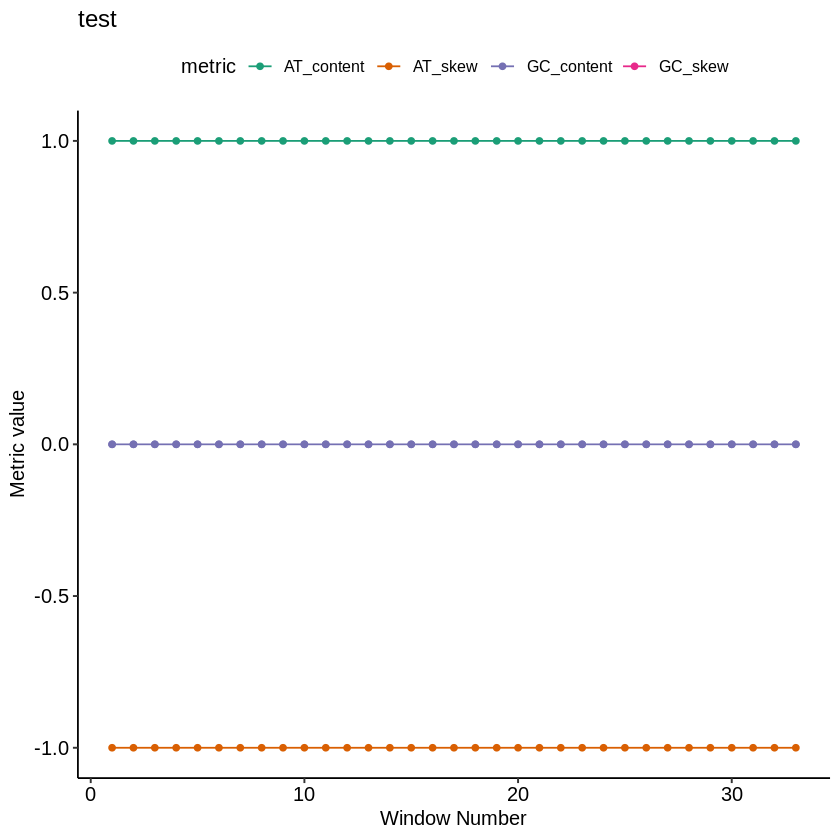